In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [4]:
data_01 = '../data/iris.data'
COLUMNS = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]
RANDOM_STATE = 42

In [32]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=RANDOM_STATE
)

In [33]:
df = pd.DataFrame(features, columns=['x', 'y'])
df['true_label'] = true_labels

In [34]:
df.head()

,x,y,true_label
0,9.770759,3.276210,1
1,-9.713497,11.274518,0
2,-6.913306,-9.347559,2
3,-10.861859,-10.750635,2
4,-8.500380,-4.543704,2


In [35]:
df.tail()

,x,y,true_label
195,-6.024631,-2.822880,2
196,2.677814,9.494375,0
197,1.833638,11.124732,0
198,3.342066,4.967784,1
199,1.959504,4.137652,1


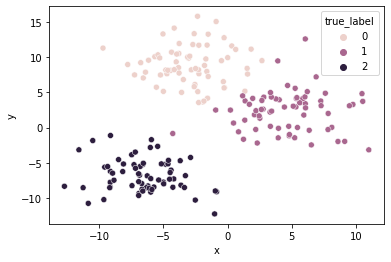

In [36]:
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df
)
plt.show()

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=100,
    random_state=RANDOM_STATE
)

In [25]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, random_state=42)

In [29]:
print(f'Lowest sum of squared error: {kmeans.inertia_:.1f}')
print('Final locations of the centroids')
print(kmeans.cluster_centers_)
print(f'Number of iterations spent to converge: {kmeans.n_iter_}')

Lowest sum of squared error: 74.6
Final locations of the centroids
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
Number of iterations spent to converge: 2


In [37]:
df['pred_label'] = kmeans.labels_

In [38]:
df.head()

,x,y,true_label,pred_label
0,9.770759,3.276210,1,2
1,-9.713497,11.274518,0,0
2,-6.913306,-9.347559,2,1
3,-10.861859,-10.750635,2,1
4,-8.500380,-4.543704,2,1


In [39]:
df.tail()

,x,y,true_label,pred_label
195,-6.024631,-2.822880,2,1
196,2.677814,9.494375,0,0
197,1.833638,11.124732,0,0
198,3.342066,4.967784,1,2
199,1.959504,4.137652,1,2


In [42]:
score = accuracy_score(df['true_label'], df['pred_label'])
print(f'Subset accuracy: {score:.1%}')

Subset accuracy: 33.5%


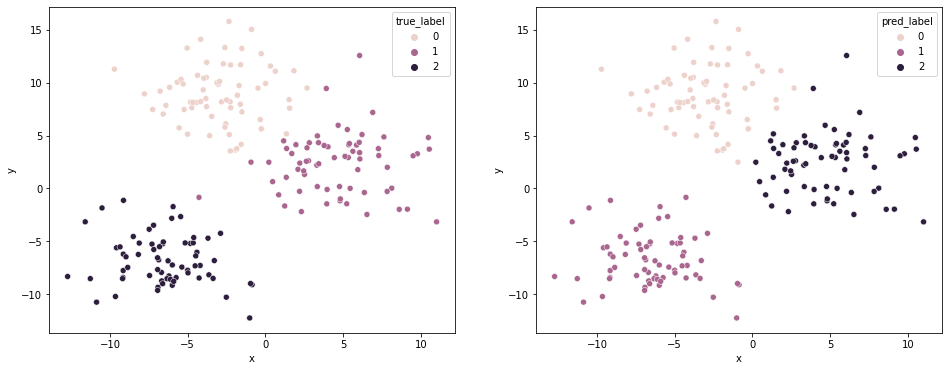

In [45]:
plt.figure(figsize=(8 * 2, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df
)

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='x', 
    y='y', 
    hue='pred_label',
    data=df
)

plt.show()

In [4]:
df = pd.read_csv(data_01, names=COLUMNS)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
le = LabelEncoder()
le.fit(df['class'])
classes = le.classes_
encoded = le.transform(classes)
label_encoding = {}
for c, e in zip(classes, encoded):
    label_encoding[c] = e
print(f'Label encoding: {label_encoding}')

Label encoding: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [13]:
df_model = df.copy()
df_model['target'] = le.transform(df['class'])
df_model = df_model.drop(columns=['class'])
df_model = shuffle(df_model, random_state=RANDOM_STATE)

In [14]:
df_model.head()

,sepal_length,sepal_width,petal_length,petal_width,target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0


## Resource
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)
- [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)